# importing files as dataframes

In [207]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
import re

# Replace 'your_file_path' with the actual file paths where the Excel files are located
file_paths = ['AI Research Scientist.xlsx','Data Scientist.xlsx',
              'Computer Vision Engineer.xlsx', 'Natural Language Processing Engineer.xlsx',
              'Software Developer.xlsx']

# Load the data from each Excel file and assign labels
profiles_list = []
for path in file_paths:
    df = pd.read_excel(path)
    df['Profile'] = path.split('/')[-1].split('.')[0]  # Extract the profile name from the file name
    profiles_list.append(df)

# Combine all profiles into a single DataFrame
all_profiles_df = pd.concat(profiles_list, ignore_index=True)


In [208]:
columns_to_remove = ['name', 'linkedin_link', 'currentJobTitle', 'education_from_date', 'education_to_date','education_description','education_institution_name','experience_section_from_date', 'experience_section_to_date','experience_section_duration', 'experience_section_company','experience_section_location','certificate_issue_authority','certificate_issue_date', 'certificate_skill']  # Replace with your actual column names
all_profiles_df = all_profiles_df.drop(columns_to_remove, axis=1)


In [209]:
all_profiles_df

,about,education_degree,experience_section_position_title,experience_section_description,certficate_name,Profile
0,"Hi guys, \nHere is an AI Research Scientist, w...","-:-M.Tech, Instrumentation and signal processi...",NaN,NaN,-:-Data Analytics with Python-:-Natural Langua...,AI Research Scientist
1,"Hi guys, \nHere is an AI Research Scientist, w...","-:-M.Tech, Instrumentation and signal processi...",NaN,NaN,-:-Data Analytics with Python-:-Natural Langua...,AI Research Scientist
2,AI Applied Research Scientist and AI Product M...,NaN,NaN,NaN,NaN,AI Research Scientist
3,"As a research scientist, I specialize in the f...",-:-Anant has verified their government ID.,NaN,NaN,NaN,AI Research Scientist
4,Machine Learning Engineer with a demonstrated ...,"-:-Master's degree, Mathematics-:-Bachelor of ...",-:-AI Research Scientist-:-Machine Learning En...,-:-Skills: Data Analysis\nData Analysis-:-1) W...,-:-Building Web Applications in Django-:-Djang...,AI Research Scientist
...,...,...,...,...,...,...
500,A career with a progressive organization that ...,"-:-Bachelor of Business Administration - BBA, ...",-:-Associate cybersecurity analyst-:-Business ...,-:-Skills: SIEM · Soc engineer · Mc afee siem ...,NaN,Software Developer
501,"Highly accountable, dedicated and collaborativ...","-:-MBA, Operations Research, Operations Research",NaN,NaN,NaN,Software Developer
502,• Conducting Vulnerability Assessments Using Q...,NaN,-:-Cyber Security Analyst-:-Cyber Security Ana...,-:-nan-:-• Conducting Vulnerability Assessment...,-:-AWS Security Fundamentals-:-Microsoft 365 F...,Software Developer
503,NaN,NaN,NaN,NaN,NaN,Software Developer


# Text Cleaning

In [210]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string


# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

import re
import string

def clean_text(text):
    if pd.isnull(text):
        return ""
    # Convert text to lowercase
    text = str(text).lower()
    # Replace punctuation with a single space
    text = re.sub('['+re.escape(string.punctuation)+']', ' ', text)
    # Replace multiple spaces with a single space
    text = re.sub('\s+', ' ', text).strip()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove stopwords and lemmatize the words
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join the cleaned words in a string
    text = ' '.join(words)
    return text

# Apply the cleaning function to the 'About' section
all_profiles_df['about_cleaned'] = all_profiles_df['about'].apply(clean_text)


In [211]:
all_profiles_df['about'][0]

'Hi guys, \nHere is an AI Research Scientist, with blended experience of academia and industry, skilled with diverse areas of Machine/Deep Learning focussing around Computer Vision, Image Processing, and Data analytics. \n- Having demonstrated work history in Semantic segmentation, Document Image Processing, GANs, \nAnalytic reporting etc.\n- Awarded Gold Medal by NPTEL for the course “Programming, Data Structures And Algorithms Using\nPython” (IIT Madras) "\n- Consistently topped the courses named "Deep Learning for Computer Vision(IIT Hyderabad )",\n"Practical Machine Learning with TensorFlow (IIT Madras)", "Programming, Data Structures And\nAlgorithms Using Python (IIT Madras)" and "Introduction to Machine learning (IIT Madras)"\n- Successfully mentored our team ‘Air Cognizer’ which won first prize at Celestini Project India 2018 held\nat IIT, Delhi.\n- Successfully mentored our project teams which won first and second prizes consecutively in inter\ncollege Major Project competition

In [212]:
all_profiles_df['about_cleaned'][0]

'hi guy ai research scientist blended experience academia industry skilled diverse area machine deep learning focussing around computer vision image processing data analytics demonstrated work history semantic segmentation document image processing gans analytic reporting etc awarded gold medal nptel course “ programming data structure algorithm using python ” iit madras consistently topped course named deep learning computer vision iit hyderabad practical machine learning tensorflow iit madras programming data structure algorithm using python iit madras introduction machine learning iit madras successfully mentored team ‘ air cognizer ’ first prize celestini project india held iit delhi successfully mentored project team first second prize consecutively inter college major project competition held ggsipu new delhi respectively …see'

In [213]:
all_profiles_df = all_profiles_df.drop(['about'],axis = 1)
all_profiles_df.to_excel('combined_profil.xlsx', index = False)

In [214]:
all_profiles_df

,education_degree,experience_section_position_title,experience_section_description,certficate_name,Profile,about_cleaned
0,"-:-M.Tech, Instrumentation and signal processi...",NaN,NaN,-:-Data Analytics with Python-:-Natural Langua...,AI Research Scientist,hi guy ai research scientist blended experienc...
1,"-:-M.Tech, Instrumentation and signal processi...",NaN,NaN,-:-Data Analytics with Python-:-Natural Langua...,AI Research Scientist,hi guy ai research scientist blended experienc...
2,NaN,NaN,NaN,NaN,AI Research Scientist,ai applied research scientist ai product manag...
3,-:-Anant has verified their government ID.,NaN,NaN,NaN,AI Research Scientist,research scientist specialize field artificial...
4,"-:-Master's degree, Mathematics-:-Bachelor of ...",-:-AI Research Scientist-:-Machine Learning En...,-:-Skills: Data Analysis\nData Analysis-:-1) W...,-:-Building Web Applications in Django-:-Djang...,AI Research Scientist,machine learning engineer demonstrated history...
...,...,...,...,...,...,...
500,"-:-Bachelor of Business Administration - BBA, ...",-:-Associate cybersecurity analyst-:-Business ...,-:-Skills: SIEM · Soc engineer · Mc afee siem ...,NaN,Software Developer,career progressive organization use education ...
501,"-:-MBA, Operations Research, Operations Research",NaN,NaN,NaN,Software Developer,highly accountable dedicated collaborative sr ...
502,NaN,-:-Cyber Security Analyst-:-Cyber Security Ana...,-:-nan-:-• Conducting Vulnerability Assessment...,-:-AWS Security Fundamentals-:-Microsoft 365 F...,Software Developer,• conducting vulnerability assessment using qu...
503,NaN,NaN,NaN,NaN,Software Developer,


In [215]:
import pandas as pd

# Function to categorize degree types
def categorize_degree(degree_str):
    if pd.isna(degree_str):
        return {
            'Has_PhD': 0,
            'Has_Masters': 0,
            'Has_Bachelors': 0,
            'Has_Associate': 0,
            'Has_Diploma': 0,
        }
    
    # Normalize the text to make keyword matching more consistent
    degree_str = degree_str.lower()
    
    return {
        'Has_PhD': int('ph.d' in degree_str or 'phd' in degree_str or 'doctor' in degree_str),
        'Has_Masters': int('master' in degree_str or 'mtech' in degree_str or 'm.sc' in degree_str or 'mba' in degree_str),
        'Has_Bachelors': int('bachelor' in degree_str or 'btech' in degree_str or 'be' in degree_str or 'b.sc' in degree_str),
        'Has_Associate': int('associate' in degree_str),
        'Has_Diploma': int('diploma' in degree_str or 'post graduate diploma' in degree_str),
        
    }

# Apply the categorization function to each row in the 'education_degree' column
degree_categories = all_profiles_df['education_degree'].apply(categorize_degree)

# Convert the resulting series of dictionaries to a dataframe
degree_categories_df = pd.DataFrame(degree_categories.tolist())

# Concatenate the new degree categories dataframe with the original data
all_profiles_df = pd.concat([all_profiles_df, degree_categories_df], axis=1)


In [216]:

all_profiles_df = all_profiles_df.drop(['education_degree'],axis = 1)
all_profiles_df


,experience_section_position_title,experience_section_description,certficate_name,Profile,about_cleaned,Has_PhD,Has_Masters,Has_Bachelors,Has_Associate,Has_Diploma
0,NaN,NaN,-:-Data Analytics with Python-:-Natural Langua...,AI Research Scientist,hi guy ai research scientist blended experienc...,0,0,0,0,0
1,NaN,NaN,-:-Data Analytics with Python-:-Natural Langua...,AI Research Scientist,hi guy ai research scientist blended experienc...,0,0,0,0,0
2,NaN,NaN,NaN,AI Research Scientist,ai applied research scientist ai product manag...,0,0,0,0,0
3,NaN,NaN,NaN,AI Research Scientist,research scientist specialize field artificial...,0,0,0,0,0
4,-:-AI Research Scientist-:-Machine Learning En...,-:-Skills: Data Analysis\nData Analysis-:-1) W...,-:-Building Web Applications in Django-:-Djang...,AI Research Scientist,machine learning engineer demonstrated history...,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
500,-:-Associate cybersecurity analyst-:-Business ...,-:-Skills: SIEM · Soc engineer · Mc afee siem ...,NaN,Software Developer,career progressive organization use education ...,0,0,1,0,0
501,NaN,NaN,NaN,Software Developer,highly accountable dedicated collaborative sr ...,0,1,0,0,0
502,-:-Cyber Security Analyst-:-Cyber Security Ana...,-:-nan-:-• Conducting Vulnerability Assessment...,-:-AWS Security Fundamentals-:-Microsoft 365 F...,Software Developer,• conducting vulnerability assessment using qu...,0,0,0,0,0
503,NaN,NaN,NaN,Software Developer,,0,0,0,0,0


In [217]:
import pandas as pd

# Define a function to split the position titles and clean them
def extract_positions(positions_str):
    if pd.isna(positions_str):
        return []
    
    # Split the string by '-:-', trim whitespace, and filter out any empty strings
    positions = [position.strip() for position in positions_str.split('-:-') if position.strip()]
    return positions

# Apply the function to the 'experience_section_position_title' column
all_profiles_df['experience_positions'] = all_profiles_df['experience_section_position_title'].apply(extract_positions)

# Now, 'all_profiles_df' contains a new column 'experience_positions' with the list of positions


In [218]:
import re
import string

# Function to concatenate positions into a single standardized string
def standardize_positions(positions_list):
    # Join the list into a single string with spaces
    positions_str = ' '.join(positions_list)
    
    # Replace newline characters with spaces
    positions_str = positions_str.replace('\n', ' ')
    
    # Remove punctuation using a regular expression
    positions_str = re.sub(f'[{re.escape(string.punctuation)}]', '', positions_str)
    
    # Convert to lowercase
    positions_str = positions_str.lower()
    
    return positions_str

# Apply the function to concatenate and standardize the position titles
all_profiles_df['standardized_positions'] = all_profiles_df['experience_positions'].apply(standardize_positions)


In [219]:
columns_to_remove = ['experience_positions', 'experience_section_position_title']  # Replace with your actual column names
all_profiles_df = all_profiles_df.drop(columns_to_remove, axis=1)


# standardized positions 
# did one hot encoding for degree
# about section cleaned


In [220]:
all_profiles_df

,experience_section_description,certficate_name,Profile,about_cleaned,Has_PhD,Has_Masters,Has_Bachelors,Has_Associate,Has_Diploma,standardized_positions
0,NaN,-:-Data Analytics with Python-:-Natural Langua...,AI Research Scientist,hi guy ai research scientist blended experienc...,0,0,0,0,0,
1,NaN,-:-Data Analytics with Python-:-Natural Langua...,AI Research Scientist,hi guy ai research scientist blended experienc...,0,0,0,0,0,
2,NaN,NaN,AI Research Scientist,ai applied research scientist ai product manag...,0,0,0,0,0,
3,NaN,NaN,AI Research Scientist,research scientist specialize field artificial...,0,0,0,0,0,
4,-:-Skills: Data Analysis\nData Analysis-:-1) W...,-:-Building Web Applications in Django-:-Djang...,AI Research Scientist,machine learning engineer demonstrated history...,0,1,1,0,0,ai research scientist machine learning enginee...
...,...,...,...,...,...,...,...,...,...,...
500,-:-Skills: SIEM · Soc engineer · Mc afee siem ...,NaN,Software Developer,career progressive organization use education ...,0,0,1,0,0,associate cybersecurity analyst business devel...
501,NaN,NaN,Software Developer,highly accountable dedicated collaborative sr ...,0,1,0,0,0,
502,-:-nan-:-• Conducting Vulnerability Assessment...,-:-AWS Security Fundamentals-:-Microsoft 365 F...,Software Developer,• conducting vulnerability assessment using qu...,0,0,0,0,0,cyber security analyst cyber security analyst ...
503,NaN,NaN,Software Developer,,0,0,0,0,0,


# cleaning experience section description

In [221]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download the required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Initializing the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to clean the text: remove punctuation, stop words, and perform lemmatization
def clean_description(description):
    if pd.isna(description):
        return ""
    
    # Tokenize the description
    words = word_tokenize(description)
    
    # Remove punctuation and stop words, and then lemmatize the remaining words
    cleaned_description = [
        lemmatizer.lemmatize(word.lower())
        for word in words
        if word.isalpha() and word.lower() not in stop_words
    ]
    
    # Join the cleaned words back into a single string
    return ' '.join(cleaned_description)

# Apply the cleaning function to the 'experience_section_description' column
all_profiles_df['cleaned_experience_description'] = all_profiles_df['experience_section_description'].apply(clean_description)

# Show the results for the new column
all_profiles_df[['experience_section_description', 'cleaned_experience_description']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amolharsh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amolharsh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/amolharsh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,experience_section_description,cleaned_experience_description
0,NaN,
1,NaN,
2,NaN,
3,NaN,
4,-:-Skills: Data Analysis\nData Analysis-:-1) W...,data analysis data working automatic speech re...


In [222]:
columns_to_remove = ['experience_section_description']  # Replace with your actual column names
all_profiles_df = all_profiles_df.drop(columns_to_remove, axis=1)

In [223]:
all_profiles_df

,certficate_name,Profile,about_cleaned,Has_PhD,Has_Masters,Has_Bachelors,Has_Associate,Has_Diploma,standardized_positions,cleaned_experience_description
0,-:-Data Analytics with Python-:-Natural Langua...,AI Research Scientist,hi guy ai research scientist blended experienc...,0,0,0,0,0,,
1,-:-Data Analytics with Python-:-Natural Langua...,AI Research Scientist,hi guy ai research scientist blended experienc...,0,0,0,0,0,,
2,NaN,AI Research Scientist,ai applied research scientist ai product manag...,0,0,0,0,0,,
3,NaN,AI Research Scientist,research scientist specialize field artificial...,0,0,0,0,0,,
4,-:-Building Web Applications in Django-:-Djang...,AI Research Scientist,machine learning engineer demonstrated history...,0,1,1,0,0,ai research scientist machine learning enginee...,data analysis data working automatic speech re...
...,...,...,...,...,...,...,...,...,...,...
500,NaN,Software Developer,career progressive organization use education ...,0,0,1,0,0,associate cybersecurity analyst business devel...,siem soc engineer mc afee siem security operat...
501,NaN,Software Developer,highly accountable dedicated collaborative sr ...,0,1,0,0,0,,
502,-:-AWS Security Fundamentals-:-Microsoft 365 F...,Software Developer,• conducting vulnerability assessment using qu...,0,0,0,0,0,cyber security analyst cyber security analyst ...,conducting vulnerability assessment using qual...
503,NaN,Software Developer,,0,0,0,0,0,,


# removing stop words and punctuations

In [224]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download the required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Initializing the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to clean the text: remove punctuation, stop words, and perform lemmatization
def clean_certificate_name(name):
    if pd.isna(name):
        return ""
    
    # Tokenize the name
    words = word_tokenize(name)
    
    # Remove punctuation and stop words, and then lemmatize the remaining words
    cleaned_name = [
        lemmatizer.lemmatize(word.lower())
        for word in words
        if word.isalpha() and word.lower() not in stop_words
    ]
    
    # Join the cleaned words back into a single string
    return ' '.join(cleaned_name)

# Apply the cleaning function to the 'certficate_name' column
all_profiles_df['cleaned_certificate_name'] = all_profiles_df['certficate_name'].apply(clean_certificate_name)

# Show the results for the new column
all_profiles_df[['certficate_name', 'cleaned_certificate_name']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amolharsh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amolharsh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/amolharsh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,certficate_name,cleaned_certificate_name
0,-:-Data Analytics with Python-:-Natural Langua...,analytics language complete developer guide le...
1,-:-Data Analytics with Python-:-Natural Langua...,analytics language complete developer guide le...
2,NaN,
3,NaN,
4,-:-Building Web Applications in Django-:-Djang...,web application feature application technology...


# certificate name extracted

In [225]:
all_profiles_df

,certficate_name,Profile,about_cleaned,Has_PhD,Has_Masters,Has_Bachelors,Has_Associate,Has_Diploma,standardized_positions,cleaned_experience_description,cleaned_certificate_name
0,-:-Data Analytics with Python-:-Natural Langua...,AI Research Scientist,hi guy ai research scientist blended experienc...,0,0,0,0,0,,,analytics language complete developer guide le...
1,-:-Data Analytics with Python-:-Natural Langua...,AI Research Scientist,hi guy ai research scientist blended experienc...,0,0,0,0,0,,,analytics language complete developer guide le...
2,NaN,AI Research Scientist,ai applied research scientist ai product manag...,0,0,0,0,0,,,
3,NaN,AI Research Scientist,research scientist specialize field artificial...,0,0,0,0,0,,,
4,-:-Building Web Applications in Django-:-Djang...,AI Research Scientist,machine learning engineer demonstrated history...,0,1,1,0,0,ai research scientist machine learning enginee...,data analysis data working automatic speech re...,web application feature application technology...
...,...,...,...,...,...,...,...,...,...,...,...
500,NaN,Software Developer,career progressive organization use education ...,0,0,1,0,0,associate cybersecurity analyst business devel...,siem soc engineer mc afee siem security operat...,
501,NaN,Software Developer,highly accountable dedicated collaborative sr ...,0,1,0,0,0,,,
502,-:-AWS Security Fundamentals-:-Microsoft 365 F...,Software Developer,• conducting vulnerability assessment using qu...,0,0,0,0,0,cyber security analyst cyber security analyst ...,conducting vulnerability assessment using qual...,security fundamental cns certified network sec...
503,NaN,Software Developer,,0,0,0,0,0,,,


In [226]:
columns_to_remove = ['certficate_name']  # Replace with your actual column names
all_profiles_df = all_profiles_df.drop(columns_to_remove, axis=1)

In [227]:
all_profiles_df.to_excel('final_combined_profil.xlsx', index = False)

In [228]:
all_profiles_df.iloc[50:150]

,Profile,about_cleaned,Has_PhD,Has_Masters,Has_Bachelors,Has_Associate,Has_Diploma,standardized_positions,cleaned_experience_description,cleaned_certificate_name
50,AI Research Scientist,business analyst business analyst,0,0,1,0,0,ai research scientist data science intern qual...,analyst business,
51,AI Research Scientist,researcher skill machine learning computationa...,1,1,1,0,0,ai research lead vice president research assoc...,ai finance explainable ai explainable ai finan...,
52,AI Research Scientist,built set different unet like encoder decoder ...,0,0,0,0,0,,,tensorflow developer computer vision learning ...
53,AI Research Scientist,experienced engineer demonstrated history work...,0,1,1,0,0,,,
54,AI Research Scientist,currently undergraduate computer science msc b...,0,0,0,0,0,,,data structure algorithm using c python oop ob...
...,...,...,...,...,...,...,...,...,...,...
145,Data Scientist,full stack data scientist experience every ste...,0,0,1,0,0,data scientist data scientist data scientist a...,maharashtra india pune maharashtra india worke...,
146,Data Scientist,data scientist ml engineer strong math compute...,0,1,1,0,0,data scientist data scientist data engineer da...,aug yr mo aug aug yr mo part advance analytics...,
147,Data Scientist,hey result driven data scientist passion lever...,0,0,0,0,0,data scientist data scientist data specialist ...,remote skill natural language processing nlp d...,data science machine learning sql database boo...
148,Data Scientist,data science · statistical modeling · artifici...,0,0,0,0,0,,,inventor edge fundamental


# performing tf-idf

In [229]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming all_profiles_df is your dataframe
# Fill missing text data with placeholder
all_profiles_df['about_cleaned'].fillna('N/A', inplace=True)
all_profiles_df['standardized_positions'].fillna('N/A', inplace=True)
all_profiles_df['cleaned_experience_description'].fillna('N/A', inplace=True)
all_profiles_df['cleaned_certificate_name'].fillna('N/A', inplace=True)

# Function to create a string of qualifications based on binary columns
def create_qualification_string(row):
    qualifications = []
    if row['Has_PhD'] == 1:
        qualifications.append('phd')
    if row['Has_Masters'] == 1:
        qualifications.append('masters')
    if row['Has_Bachelors'] == 1:
        qualifications.append('bachelors')
    if row['Has_Associate'] == 1:
        qualifications.append('associate')
    if row['Has_Diploma'] == 1:
        qualifications.append('diploma')
    return ' '.join(qualifications)

# Apply the function to each row
all_profiles_df['qualification_keywords'] = all_profiles_df.apply(create_qualification_string, axis=1)

# Combine all text columns into a single text column for TF-IDF
all_profiles_df['combined_text'] = all_profiles_df['about_cleaned'] + " " + \
                                   all_profiles_df['standardized_positions'] + " " + \
                                   all_profiles_df['cleaned_experience_description'] + " " + \
                                   all_profiles_df['cleaned_certificate_name'] + " " + \
                                   all_profiles_df['qualification_keywords']

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)


In [230]:
all_profiles_df = all_profiles_df[['combined_text', 'Profile']]

In [231]:
all_profiles_df

,combined_text,Profile
0,hi guy ai research scientist blended experienc...,AI Research Scientist
1,hi guy ai research scientist blended experienc...,AI Research Scientist
2,ai applied research scientist ai product manag...,AI Research Scientist
3,research scientist specialize field artificial...,AI Research Scientist
4,machine learning engineer demonstrated history...,AI Research Scientist
...,...,...
500,career progressive organization use education ...,Software Developer
501,highly accountable dedicated collaborative sr ...,Software Developer
502,• conducting vulnerability assessment using qu...,Software Developer
503,,Software Developer


In [258]:

text = "Samyucktha G +91 63748 04725 • samyucktha.ganesapandian@plaksha.edu.in B.Tech Biological Systems Engineering Class 12 ISC Class 10 ICSE EDUCATION Plaksha University, Mohali VMJ School, Madurai Lakshmi School, Madurai 8.58/10 2025 99% 2021 92% 2019 COURSEWORK DONE ● Semester 1: Design Thinking, Intro to Physics, Linear Algebra, Computational Thinking and Intro to C++, Art of Thinking and Reasoning. ● Semester 2: Programming and Data Structures, Microeconomics, Probability and Statistics, Nature’s Machines (Fundamentals of Biology, Biomimicry, and Bio-inspired Engineering). ● Semester 3: Intro to Robotics, Ethics and Communication of Technological Innovation, Electronic Systems Engineering, Intro to Data Science and AI, Calculus. ● Semester 4: Biochemistry and Molecular Biology, Bioinformatics and Computational Biology,, Bioprocess Engineering, Material Science for Bioengineers, Optimization. ● Semester 5: Cell Biology, Stochastic Modelling in Biology, Modelling Cellular Transport and Reactions, Sensing and Actuation (Robotics). SCHOLASTIC ACHIEVEMENTS ● Top 1% in India – Class 12th Examination ISC 2020-21, Madurai District Topper. ● Proficiency Award - Awarded annually to students with consistent academic excellence, recipient out of 250 students for 7 consecutive years. EXPERIENCE Math Research Intern | Dr Amrik Sen, Plaksha University ● Conducted an in-depth analysis of the current educational landscape, addressing the accessibility challenges faced by underprivileged communities; investigated the drawbacks of standardized education systems and the concept of gamification and its positive influence on student attitudes and learning outcomes. ● Explored the metaverse as a novel medium of education delivery, emphasizing its potential to create immersive and interactive learning experiences. ● Engineered gamified math education simulations including concepts like random walks, Monte-Carlo Simulation, and time reversal, while also crafting 3D models and assets in Blender. ● Played an integral role in preparing and enhancing the presentation on our project for an international conference in Madrid, Spain, in the fall of 2022. PROJECTS Carbon Capture and Wastewater Remediation via Algal Systems | Grand Challenges Scholar Program Aug 2023 – Present ● Spearheading an ongoing initiative focused on developing an integrated algae-based carbon capture system to address the pressing need for sustainable carbon reduction solutions. ● Collaborating with Dr. Prashant Kumar and Dr. Malini Balakrishnan at Plaksha University's Center of Water Security to incorporate wastewater into the integrated algae-based carbon capture system, fostering circular economy practices. Heparin Research Project | Dr Rucha Joshi, Plaksha University Jan 2023 – May 2023 ● Extensively researched Heparin's dual role as a vascularization and antibacterial agent. ● Analyzed previous research studies, identifying gaps in knowledge and potential areas for exploration. ● Designed and executed an assay protocol to assess Heparin Sodium Salt's antibacterial efficacy, taking into consideration variables such as concentration, exposure time, and bacterial species. Biomarker Identification | Dr Monika Sharma, Plaksha University Apr 2023 – May 2023 ● Led a team of 4 members to recreate a seminal research paper's methodology for the identification of lung adenocarcinoma biomarkers. ● Applied advanced bioinformatic techniques, including retrieving and cleaning sample data from the GEO database using R, conducting Differentially Expressed Gene Analysis using GEO2R, identifying the top hub genes through PPI network analysis in Cytoscape, and performing gene enrichment analysis to gain insights into the functions of the identified gene. ● Ensured project progress and maintained team accountability, resulting in the timely completion of the project's objectives. Cancer Growth Models Jan 2023 – May 2023 ● Conducted an extensive study on cancer biology, tumour growth, its mathematical modeling and synthesized the literature review into a cohesive report. Aug 2022 – Jan 2023 ● Study explored the fundamental characteristics and hallmarks of cancer cells; the genetic and molecular basis of carcinogenesis focusing on mutations, oncogenes, and tumor suppressor genes; analyzed classical tumour growth models (exponential model, power law, Gompertz model, etc.); highlighted their underlying assumptions and limitations; examined their historical context and mathematical derivations. Project Sunflower Mar 2022 – Jun 2022 ● Investigated the University’s energy system and potential renewable alternatives, assessed campus carbon footprint, and devised a plan for implementing solar panel projects. AWARDS & RECOGNITION ● Juran Award – Top 3 out of 70-75 teams in the Case Study Competition, International Convention on Student Quality Circle, 2017. ● Gold Medal – Tamil Nadu State Archery Championship, 2016-17. ● Best All-Rounder - Recognized as the best all-rounder for excelling in sports, academics, and extracurricular activities during class 7 and 8. SKILLS ● Biochemistry: Carbohydrate, lipid, protein, nucleic acid estimation (qualitative and quantitative), Immunosorbent assay techniques ● Molecular Biology: Spectrophotometric analyses, Microbial nucleic acid extraction, Nucleic acid amplification techniques (qPCR, Real-Time PCR, RT-PCR) Nucleic acid sequencing ● Bioinformatics: Sequence alignment (NW & SW algorithms, BLAST), Phylogenetic analyses (MEGA), Proficient in using various software and databases (Pfam, Uniprot, NCBI, RCSB PDB) ● Computational Biology: Data curation and analyses using R, Differentially expressed gene (DEG) analysis (GEO2R), Protein-protein interaction (PPI) network analyses (Cytoscape), Protein/molecule analysis & molecular docking (UCSF Chimera, PyMol) ● Laboratory Techniques: Bacteria handling (culturing, spreading, streaking, antibacterial assay), Media preparation, Gel preparation, Clean-up; Experience with various instruments including spectrophotometers, PCR machines, electrophoresis equipment, autoclaves, laminar airflow chambers, incubators, and centrifuges ● Research: Data collection and Curation, Literature review, Project management, logbook maintenance ● People Skills: Collaboration, Task delegation, Negotiation ● Content writing: Content creation, Report writing, Storytelling. ● Programming Languages: MATLAB, Python, R, C++, Java ● Design Software: Blender, Figma, Canva ● Soft Skills: Adaptability, Leadership, Communication"
clean = clean_text(text)
new_data = pd.DataFrame({'Profile': ["Test"], 'combined_text': [clean]}, index=[0])
all_profiles_df = all_profiles_df.append(new_data, ignore_index=True)

/var/folders/q8/6ygp14f90fs0hmwczw4f64v80000gn/T/ipykernel_51648/1139426812.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_profiles_df = all_profiles_df.append(new_data, ignore_index=True)


In [259]:
all_profiles_df

,combined_text,Profile
0,hi guy ai research scientist blended experienc...,AI Research Scientist
1,hi guy ai research scientist blended experienc...,AI Research Scientist
2,ai applied research scientist ai product manag...,AI Research Scientist
3,research scientist specialize field artificial...,AI Research Scientist
4,machine learning engineer demonstrated history...,AI Research Scientist
...,...,...
503,,Software Developer
504,,Software Developer
505,dstp project gcsp dr prashanth suresh kumar ma...,Test
506,siddhant deshpande • siddhant deshpande plaksh...,Test


In [260]:
lst = [
    
    'Computational Biologist.xlsx',
    'Data Analyst.xlsx',
    'Economist.xlsx',
    'Electromechanical engineer.xlsx',
    'Evolutionary Biologist.xlsx',
    'Financial Analyst.xlsx',
    'Genetic Engineer.xlsx',
    'Product Manager.xlsx',
    'Protocol engineer.xlsx',
    'Quant.xlsx',
    'Robotics Machine Learning Engineer.xlsx',
    'RoboticsEngineer.xlsx',
    'Synthetic Biologist.xlsx'
]
# Load the data from each Excel file and assign labels
profiles_list = []
for path in lst:
    df = pd.read_excel(path)
    df['Profile'] = path.split('/')[-1].split('.')[0]  # Extract the profile name from the file name
    profiles_list.append(df)

# Combine all profiles into a single DataFrame
rest_df = pd.concat(profiles_list, ignore_index=True)



# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

import re
import string

def clean_text(text):
    if pd.isnull(text):
        return ""
    # Convert text to lowercase
    text = str(text).lower()
    # Replace punctuation with a single space
    text = re.sub('['+re.escape(string.punctuation)+']', ' ', text)
    # Replace multiple spaces with a single space
    text = re.sub('\s+', ' ', text).strip()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove stopwords and lemmatize the words
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join the cleaned words in a string
    text = ' '.join(words)
    return text


# Apply the cleaning function to the 'About' section
rest_df['about_cleaned'] = rest_df['combined_text'].apply(clean_text)
rest_df.drop(['combined_text'], axis=1, inplace=True)



rest_df

,Profile,about_cleaned
0,Computational Biologist,experienced computational biologist demonstrat...
1,Computational Biologist,full stack biologist data decision scientist y...
2,Computational Biologist,researcher entrepreneur team currently focus c...
3,Computational Biologist,hi computational biologist research focused ne...
4,Computational Biologist,experienceexperience icrisat logo icrisaticris...
...,...,...
308,Synthetic Biologist,research scientist ph biotechnology bangalore ...
309,Synthetic Biologist,microbiologist interested studying physiology ...
310,Synthetic Biologist,thorough bio pharma professional year global i...
311,Synthetic Biologist,system synthetic biologist working creating ne...


In [261]:
rest_df.rename(columns={'about_cleaned': 'combined_text'}, inplace=True)

In [263]:
rest_df = rest_df[['combined_text', 'Profile']]
combined_df = pd.concat([rest_df, all_profiles_df], axis=0, ignore_index=True)
combined_df

In [265]:

# Fit and transform the combined text column with TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_df['combined_text'])
tfidf_matrix

<821x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 93746 stored elements in Compressed Sparse Row format>

# Dimension reduction 
## Tried PCA, LDA NMF maximum accuracy with TruncatedSVD algo for dimension reduction


'''
TruncatedSVD is a technique used for dimensionality reduction of matrices. It simplifies the calculation by breaking down the matrix into its components. The technique is similar to PCA (Principal Component Analysis), but it works on the data matrix instead of the covariance matrix.

In simple terms, TruncatedSVD is used to reduce the number of input variables for predictive analysis. This is done by dropping the unused variables from the dataset, which do not affect the output variable but affect the overall result.

The technique is particularly useful when the number of input variables is high, and many of them do not affect the output variable. TruncatedSVD can be used to reduce the number of input variables, which results in a simpler predictive model with higher performance.
'''

In [266]:

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

from sklearn.decomposition import TruncatedSVD

# Choose the number of components, for example, 100
# dimensionality reduction
n_components = 100
svd = TruncatedSVD(n_components=n_components)

# Fit and transform the TF-IDF matrix
reduced_tfidf_matrix = svd.fit_transform(tfidf_matrix)

# Convert the reduced matrix back to a DataFrame (optional)
reduced_tfidf_df = pd.DataFrame(reduced_tfidf_matrix)

final_features = reduced_tfidf_df


In [267]:
np.mean(final_features[75])

6.097395485693147e-05

In [268]:
final_features

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.128857,0.101567,-0.055738,-0.017056,0.009662,-0.169386,-0.212322,-0.124785,-0.129922,-0.065633,...,0.033214,-0.031756,0.022238,-0.006209,0.099751,0.023121,0.003457,-0.036595,0.038360,0.009419
1,0.396390,0.059821,-0.094526,-0.120735,0.143487,-0.148675,-0.055307,-0.069858,-0.029149,-0.090293,...,-0.032165,0.009924,-0.043826,0.023315,0.018745,0.029972,0.024252,-0.073382,-0.022817,-0.041152
2,0.225530,0.214453,-0.092273,0.033979,-0.020875,-0.118936,-0.195358,-0.175594,-0.084747,-0.004551,...,-0.006846,-0.004881,0.052819,-0.035187,0.043039,0.004384,-0.003793,0.043997,-0.029267,-0.002630
3,0.340702,0.213263,-0.135909,-0.099536,0.341138,-0.143906,-0.110046,0.037517,-0.086216,-0.122057,...,0.001424,0.003479,0.053409,-0.027231,0.020038,0.006611,0.031514,-0.010247,0.029962,-0.006301
4,0.115042,0.190422,-0.079075,0.036253,0.024573,-0.060143,-0.125128,-0.140273,-0.064481,-0.040288,...,-0.033893,-0.050414,0.065084,-0.046396,-0.008414,0.017548,-0.005142,0.024156,0.015109,0.060134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
818,0.154405,0.064066,-0.047727,-0.032843,-0.003227,-0.118425,-0.125881,-0.091679,-0.095649,-0.042111,...,-0.007025,0.092393,-0.068143,-0.066088,0.041036,-0.156012,0.080857,0.016918,0.149804,-0.025149
819,0.260726,0.084946,-0.037247,-0.063442,-0.128982,-0.051646,-0.092220,-0.014081,-0.020912,-0.055290,...,-0.143363,0.107027,-0.014869,0.056786,0.038966,-0.021459,0.028416,0.059754,0.013534,-0.015733


# Important

In [269]:
# Specify the file path and name for the Excel file
file_path = 'new_profiles_tf_id_truncated_data.xlsx'

# Save the DataFrame to an Excel file
final_features.to_excel(file_path, index=False)
combined_df.to_excel('profile_names_text_data.xlsx')

In [270]:

# Encode the target variable 'Profile'
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(combined_df['Profile'])


In [271]:
len(encoded_labels)

821

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_features, encoded_labels, test_size=0.2, random_state=42)


In [75]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import pandas as pd

# Step 1 & 2: Compute the centroid of each class in the training data
unique_labels = np.unique(y_train)
centroids = {}
unique_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [76]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
773,0.104964,0.116325,0.443039,-0.039190,0.039324,-0.068911,0.001125,0.019402,-0.025430,0.009484,...,-0.033480,-0.005939,0.028232,0.010643,0.012606,0.017799,-0.044441,0.047460,-0.038592,-0.012647
451,0.478351,-0.188291,-0.034766,-0.213789,0.043567,0.062941,0.057571,0.032765,-0.006065,-0.021460,...,0.005716,-0.059284,0.002602,-0.000374,0.016453,0.035319,0.090767,-0.011674,-0.009567,0.022403
338,0.410940,-0.128183,-0.001815,-0.047379,-0.025442,-0.017745,-0.074811,-0.073846,0.082814,0.095023,...,0.048955,-0.001374,-0.012832,0.005916,0.001360,-0.029036,0.021513,-0.045010,-0.003057,-0.012876
580,0.041210,0.035589,-0.006427,0.051590,-0.001183,0.028504,0.004440,0.000547,-0.016805,0.018283,...,0.058029,-0.001758,0.004604,-0.010357,-0.005413,-0.026208,-0.017827,-0.000117,-0.000743,0.050356
722,0.033085,0.002757,0.003674,0.001085,-0.005714,-0.008026,0.027387,0.009384,-0.014875,0.017187,...,-0.020790,-0.035964,-0.082138,0.062320,-0.050916,0.033813,-0.002902,-0.055104,0.027974,-0.059040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.218069,0.319225,-0.095043,0.024623,-0.096020,0.209530,0.052023,-0.083824,0.032315,-0.094067,...,0.053770,-0.003199,-0.082823,0.012983,0.019413,0.006289,-0.029870,0.001008,-0.028344,0.033227
106,0.138484,0.141950,-0.025914,0.106498,-0.028732,0.072984,0.052252,0.012352,-0.066303,0.117522,...,0.021811,0.016680,-0.018051,0.016037,0.095783,0.084330,0.093091,0.050516,0.000630,-0.066046
270,0.278574,0.167909,-0.095102,0.165609,-0.102380,0.013018,-0.007483,0.035762,0.030634,0.017858,...,-0.012394,0.006136,0.058038,0.001327,-0.007605,0.019068,-0.013722,-0.023967,-0.008105,0.012803
435,0.121711,0.037814,0.050421,-0.055508,-0.010656,0.086560,-0.069121,-0.026901,0.031778,0.023804,...,0.169963,0.028320,-0.058535,0.051333,0.011956,0.000526,-0.043599,-0.072875,0.037578,-0.036436


In [143]:
import xgboost as xgb

# Create an XGBoost classifier
model = xgb.XGBClassifier(objective='multi:softprob', num_class=len(set(encoded_labels)))

# Train the model
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)

In [144]:
import numpy as np

def get_top_three_predictions(probs, label_encoder):
    top_three = np.argsort(probs, axis=1)[:,-3:]  # Indices of top 3 predictions
    top_three_probs = np.sort(probs, axis=1)[:,-3:]  # Probabilities of top 3 predictions

    # Applying inverse transform to each set of top 3 indices
    top_three_labels = np.array([label_encoder.inverse_transform(row) for row in top_three])
    
    return top_three_labels, top_three_probs

top_three_labels, top_three_probs = get_top_three_predictions(probs, label_encoder)


In [145]:
for label, prob in zip(top_three_labels[0][::-1], top_three_probs[0][::-1]):
    print(f"{label}: {prob * 100:.2f}%")

Electromechanical engineer: 99.20%
RoboticsEngineer: 0.23%
Robotics Machine Learning Engineer: 0.18%


Accuracy: 0.77
                                      precision    recall  f1-score   support

               AI Research Scientist       0.85      0.52      0.65        21
             Computational Biologist       0.83      1.00      0.91         5
            Computer Vision Engineer       0.74      1.00      0.85        17
                        Data Analyst       0.80      0.57      0.67         7
                      Data Scientist       0.93      0.81      0.87        16
                           Economist       0.80      0.50      0.62         8
          Electromechanical engineer       0.80      0.67      0.73         6
              Evolutionary Biologist       0.67      0.50      0.57         4
                   Financial Analyst       0.75      1.00      0.86         3
                    Genetic Engineer       0.00      0.00      0.00         1
Natural Language Processing Engineer       0.65      0.75      0.70        20
                     Product Manager       0.67 

/Users/sumeetvijaywargiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sumeetvijaywargiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sumeetvijaywargiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

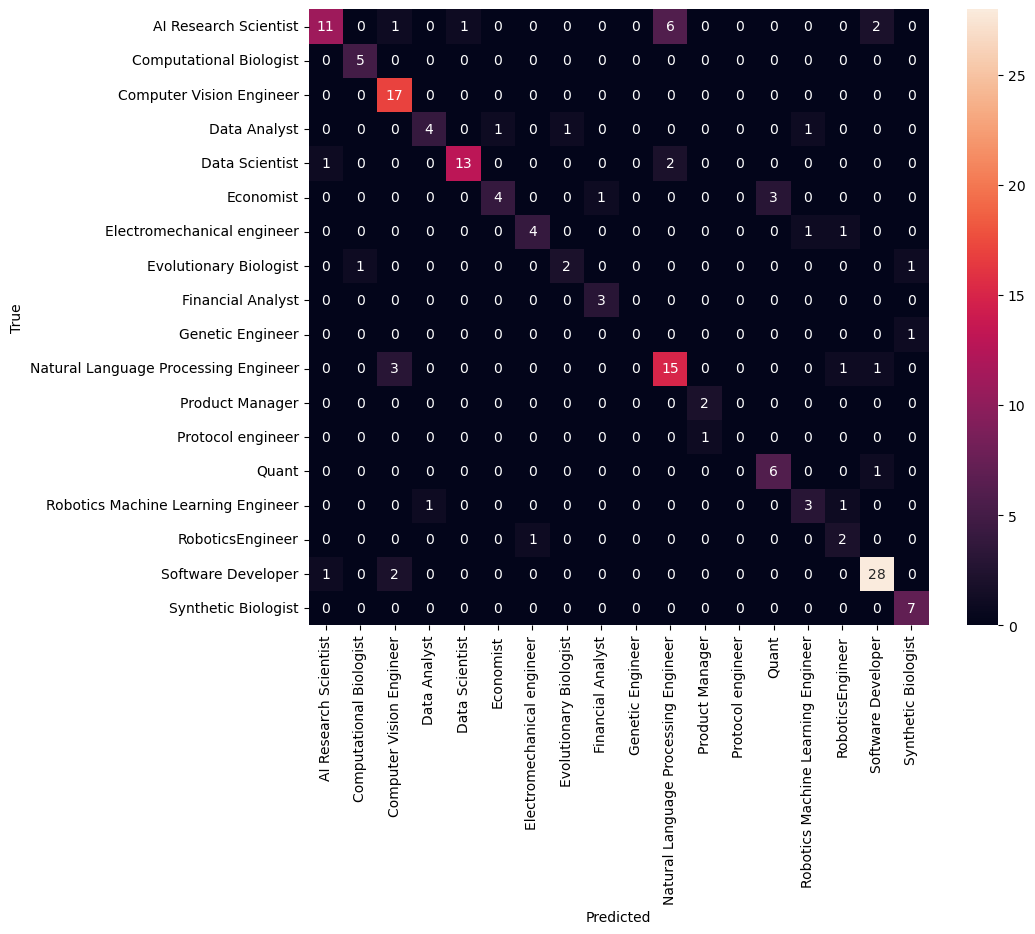

Log Loss: 0.83


In [146]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
import seaborn as sns
import matplotlib.pyplot as plt
# Predicting the classes (not probabilities) on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(class_report)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# First, get the probability predictions for the test set
probs_test = model.predict_proba(X_test)
logloss = log_loss(y_test, probs_test)
print(f"Log Loss: {logloss:.2f}")


# finding the centroid values for each class in the training dataset

In [140]:

for label in unique_labels:

    class_features = X_train[y_train == label]
    centroids[label] = np.mean(class_features, axis=0)
 
    

# Experimentation - Using Manhattan Distance

In [491]:
# MANHATTEN DISTANCE

In [492]:
# from sklearn.metrics.pairwise import manhattan_distances
# import numpy as np
# import pandas as pd

# def rank_classes_for_sample(sample, centroids, label_encoder):
#     distances = {}

#     # Convert sample to numpy array if it's a Series
#     if isinstance(sample, pd.Series):
#         sample = sample.to_numpy()

#     # Calculate Manhattan distance for each centroid
#     for label, centroid in centroids.items():
#         # Convert centroid to numpy array if it's a Series
#         if isinstance(centroid, pd.Series):
#             centroid = centroid.to_numpy()

#         # Reshape centroid and sample for compatibility
#         centroid_reshaped = centroid.reshape(1, -1)
#         sample_reshaped = sample.reshape(1, -1)

#         # Calculate Manhattan distance and store in dictionary
#         distance = manhattan_distances(sample_reshaped, centroid_reshaped)[0][0]
#         distances[label] = distance

#     # Sort the distances
#     sorted_distances = sorted(distances.items(), key=lambda x: x[1])
    
#     # Convert numerical labels back to original labels
#     labels = [label_encoder.inverse_transform([label])[0] for label, _ in sorted_distances]
    
#     # Calculate probabilities-like scores (inverted distances)
#     print("Distances: /n",distances )
#     total_distance = sum(distances.values())
#     probabilities = [(100 - (distance / total_distance * 100)) for _, distance in sorted_distances]

#     ranked_classes = [(labels[i], probabilities[i]) for i in range(len(labels))]
#     return ranked_classes


# # Predict for a single test sample
# i = 30  # Index of the test sample
# sample = X_test.iloc[i] if isinstance(X_test, pd.DataFrame) else X_test[i]

# ranked_classes = rank_classes_for_sample(sample, centroids, label_encoder)

# # Accessing the true label index from y_test
# true_label_index = y_test[i] if isinstance(y_test, np.ndarray) else y_test.iloc[i]

# true_label = label_encoder.inverse_transform([true_label_index])[0]

# # Output
# print(f"True Label: {true_label}")
# for label, probability in ranked_classes:
#     print(f"Predicted Label: {label}, Probability: {probability:.2f}%")


In [493]:
# from sklearn.metrics import classification_report

# # Function to predict the most likely class
# def predict_class(sample, centroids, label_encoder):
#     ranked_classes = rank_classes_for_sample(sample, centroids, label_encoder)
#     # The most likely class is the first one in the ranked list
#     return label_encoder.transform([ranked_classes[0][0]])[0]

# # Predict for each sample in the test set
# y_pred = [predict_class(X_test.iloc[i] if isinstance(X_test, pd.DataFrame) else X_test[i], centroids, label_encoder) for i in range(len(X_test))]

# # Generate and print the classification report
# print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


In [494]:
# def top_k_accuracy_score(y_true, X_test, k, centroids, label_encoder):
#     correct = 0
#     for i in range(len(X_test)):
#         ranked_classes = rank_classes_for_sample(X_test.iloc[i] if isinstance(X_test, pd.DataFrame) else X_test[i], centroids, label_encoder)
#         top_k_predictions = [label_encoder.transform([label])[0] for label, _ in ranked_classes[:k]]
#         if y_true[i] in top_k_predictions:
#             correct += 1
#     return correct / len(X_test)

# # Example usage: Calculate Top-3 Accuracy
# top_3_accuracy = top_k_accuracy_score(y_test, X_test, 2, centroids, label_encoder)
# print(f"Top-3 Accuracy: {top_3_accuracy}")


In [495]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix
# import numpy as np

# # Generate the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Plotting the confusion matrix
# plt.figure(figsize=(10, 7))

# # Use seaborn to create a heatmap
# sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()
# from sklearn.metrics import accuracy_score

# # Assuming y_pred contains your model's predictions and y_test contains the true labels
# accuracy = accuracy_score(y_test, y_pred)

# print(f"Accuracy: {accuracy * 100:.2f}%")



# Works best with COSINE SIMILARITY¶

# COSINE SIMILARITY


In [496]:
from sklearn.metrics.pairwise import cosine_distances
import numpy as np
import pandas as pd

def rank_classes_for_sample(sample, centroids, label_encoder):
    distances = {}

    # Convert sample to numpy array if it's a Series
    if isinstance(sample, pd.Series):
        sample = sample.to_numpy()

    # Calculate Cosine distance for each centroid
    for label, centroid in centroids.items():
        # Convert centroid to numpy array if it's a Series
        if isinstance(centroid, pd.Series):
            centroid = centroid.to_numpy()

        # Reshape centroid and sample for compatibility
        centroid_reshaped = centroid.reshape(1, -1)
        sample_reshaped = sample.reshape(1, -1)

        # Calculate Cosine distance and store in dictionary
        distance = cosine_distances(sample_reshaped, centroid_reshaped)[0][0]
        distances[label] = distance

    # Normalize the distances to convert them into similarity scores
    max_distance = max(distances.values())
    min_distance = min(distances.values())
    
#     print("distance: ", distance)
    # Normalizing distances to a range of [0, 1], where 1 is most similar
    normalized_similarities = {label: (max_distance - distance) / (max_distance - min_distance) if max_distance != min_distance else 1.0 for label, distance in distances.items()}

    # Sort the similarities in descending order (higher is more similar)
    sorted_similarities = sorted(normalized_similarities.items(), key=lambda x: x[1], reverse=True)
    
    # Convert numerical labels back to original labels
    labels = [label_encoder.inverse_transform([label])[0] for label, _ in sorted_similarities]

    # Probabilities-like scores (higher is better)
    probabilities = [similarity * 100 for _, similarity in sorted_similarities]

    ranked_classes = [(labels[i], probabilities[i]) for i in range(len(labels))]
    return ranked_classes

# Example usage of the function
# Assuming X_test, centroids, label_encoder, and y_test are already defined
#~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~
# Predict for a single test sample
i = 1 # Index of the test sample
#~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~

sample = X_test.iloc[i] if isinstance(X_test, pd.DataFrame) else X_test[i]

flag = False
for x in sample:
    if x != 0:
        flag = True
    
if (flag):
    ranked_classes = rank_classes_for_sample(sample, centroids, label_encoder)
else:
    print("\nFailed")
    print("\n!!!!!All the values in the Series are 0!!!\n")

# Accessing the true label index from y_test
true_label_index = y_test[i] if isinstance(y_test, np.ndarray) else y_test.iloc[i]

true_label = label_encoder.inverse_transform([true_label_index])[0]

# Output
print(f"True Label: {true_label}")
for label, probability in ranked_classes:
    print(f"Predicted Label: {label}, Probability: {probability:.2f}%")


True Label: Computer Vision Engineer
Predicted Label: Computer Vision Engineer, Probability: 100.00%
Predicted Label: Data Scientist, Probability: 70.47%
Predicted Label: AI Research Scientist, Probability: 66.27%
Predicted Label: Natural Language Processing Engineer, Probability: 63.47%
Predicted Label: Software Developer, Probability: 0.00%


# Classification Metric

In [497]:
def predict_class(sample, centroids, label_encoder):
    ranked_classes = rank_classes_for_sample(sample, centroids, label_encoder)
    # Return the most likely class
    return label_encoder.transform([ranked_classes[0][0]])[0]

def predict_top_k_classes(sample, centroids, label_encoder, k):
    ranked_classes = rank_classes_for_sample(sample, centroids, label_encoder)
    # Return the top k classes
    return label_encoder.transform([label[0] for label in ranked_classes[:k]])

# Predict for each sample in the test set
y_pred = [predict_class(X_test.iloc[i] if isinstance(X_test, pd.DataFrame) else X_test[i], centroids, label_encoder) for i in range(len(X_test))]


In [ ]:
from sklearn.metrics import classification_report

# Generate and print the classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
from sklearn.metrics import accuracy_score

# Assuming y_pred contains your model's predictions and y_test contains the true labels
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix

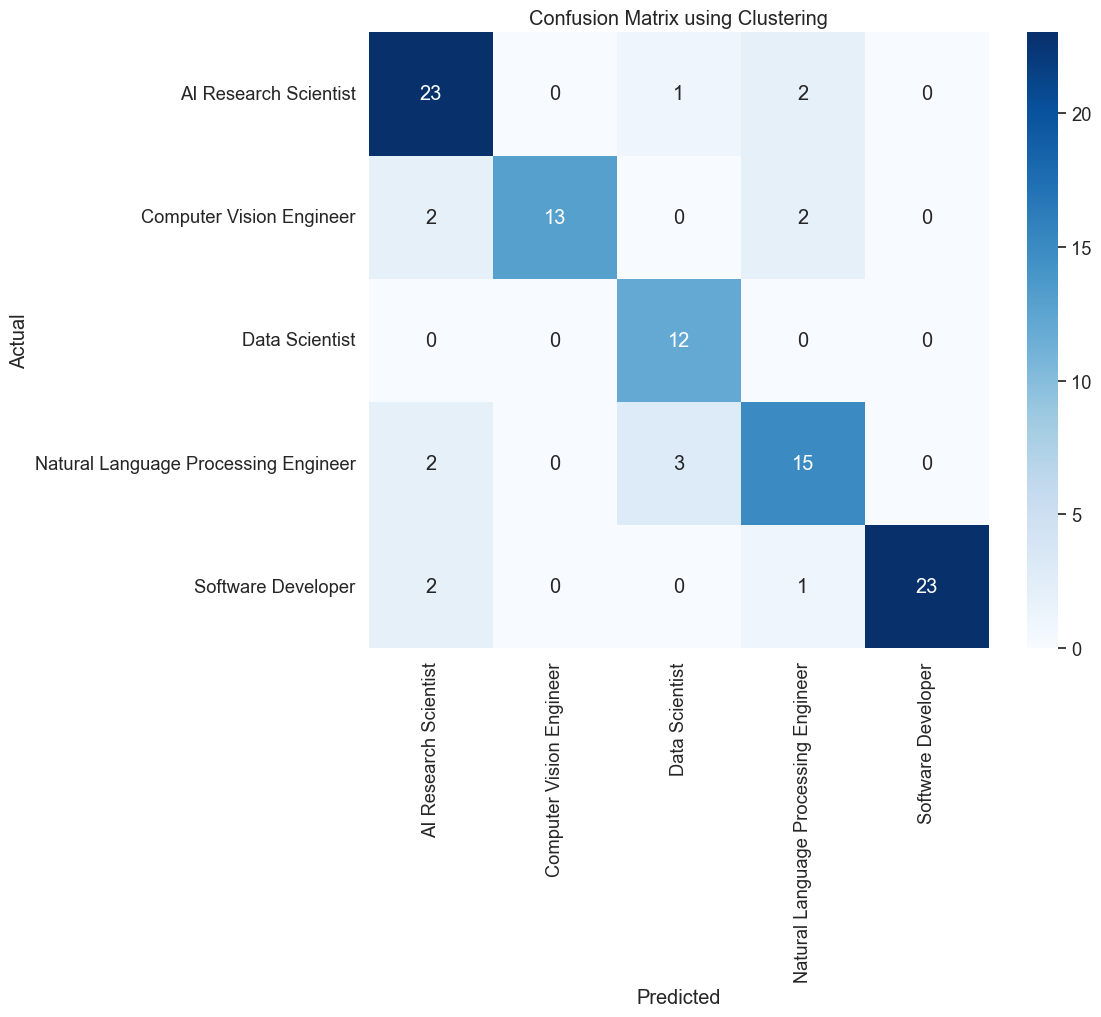

Accuracy: 85.15%


In [501]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# Predict for each sample in the test set
y_pred = [predict_class(X_test.iloc[i] if isinstance(X_test, pd.DataFrame) else X_test[i], centroids, label_encoder) for i in range(len(X_test))]

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix to a DataFrame for Seaborn
confusion_df = pd.DataFrame(confusion_mat, index=label_encoder.classes_, columns=label_encoder.classes_)

# Create a heatmap to visualize the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix using Clustering")
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

from sklearn.metrics import accuracy_score

# Assuming y_pred contains your model's predictions and y_test contains the true labels
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")


# New Evaluation metric: testing whether the true label lies in the top three ranking recommendation or not

In [500]:
def top_k_accuracy_score(y_true, X_test, k, centroids, label_encoder):
    correct = 0
    for i in range(len(X_test)):
        top_k_preds = predict_top_k_classes(X_test.iloc[i] if isinstance(X_test, pd.DataFrame) else X_test[i], centroids, label_encoder, k)
        if y_true[i] in top_k_preds:
            correct += 1
    return correct / len(y_true)

# Calculate Top-k Accuracy, for example k=3
top_k_accuracy = top_k_accuracy_score(y_test, X_test, 3, centroids, label_encoder)
print(f"Top-3 Accuracy: {top_k_accuracy *100} %")


Top-3 Accuracy: 96.03960396039604 %
